In [ ]:
# 1° Problema de Negócio
# Prever a Intenção de Compra de Usuários de E-commerce

In [1]:
# Instalar 0 pacote watermark
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook
!pip install -q -U watermark

In [125]:
# import
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import sklearn
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Versões dos pacotes usados neste Jupyter Notebook
%reload_ext watermark
%watermark-a " Cientista de Dados na Pratica"--iversions


Author:  Cientista de Dados na Pratica

pandas    : 1.1.5
matplotlib: 3.2.2
IPython   : 5.5.0
sklearn   : 0.0
numpy     : 1.19.5
seaborn   : 0.11.2



In [4]:
# Carga dos Dados
df_original = pd.read_csv('online_shoppers_intention.csv')
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [25]:
# shape
df_original.shape

(12330, 18)

In [26]:
# Tipos de dados
df_original.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [ ]:
# Verificando Valores Missing
print(df_original.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
# Verificando valores Únicos
df_original.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [ ]:
# Para fins de visualização dividiremos dados em variáveis contínuas e categóricas. Trataremos todas as variáveis com menos de 30 entradas únicas como categóricas.

In [27]:
# Preparando os Dados para o Plot
# Criar uma Cópia de Dataset original
df = df_original.copy()

In [28]:
# Listas vazias para os resultados
continuos = []
categorical = []

In [29]:
# loop pelas colunas 
for c in df.columns[:-1]:
     if df.nunique()[c]>= 30 :
        continuos.append(c)
     else:
         categorical.append(c)

In [30]:
continuos

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [31]:
categorical

['Administrative',
 'Informational',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [32]:
# Variáveis Contínuas
df[continuos].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1,0.000000,0.20,0.20,0.0
1,0.0,0.0,2,64.000000,0.00,0.10,0.0
2,0.0,0.0,1,0.000000,0.20,0.20,0.0
3,0.0,0.0,2,2.666667,0.05,0.14,0.0
4,0.0,0.0,10,627.500000,0.02,0.05,0.0


In [33]:
df[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0,0.0,Feb,3,3,1,4,Returning_Visitor,True


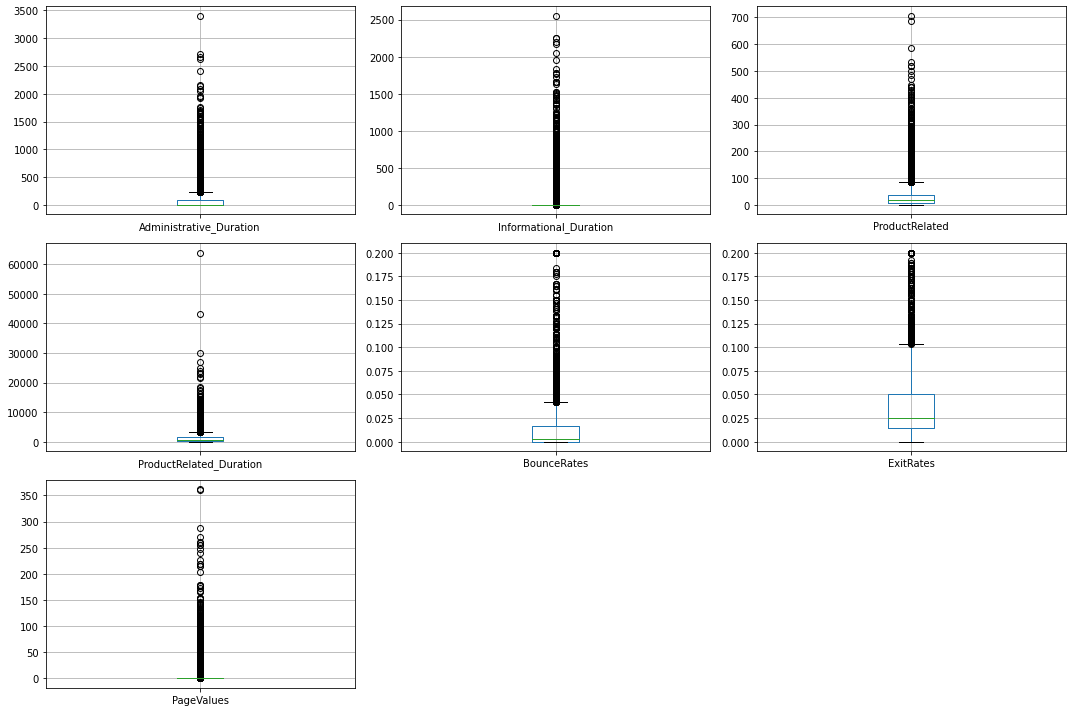

In [34]:
# Plot das Variáveis Contínuas 
# Tamanho da Área de Plotagem
fig = plt.figure(figsize= (15,10))

# Loop Pelas Variáveis Contínuas
for i, col in enumerate(continuos):
  plt.subplot(3, 3, i +1);
  df.boxplot(col);
  plt.tight_layout()
  plt.savefig('boxplot1.png')

In [ ]:
# Variáveis contínuas parecem extremamente distorcidas. Vamos aplicar a transformação de log para melhor visualização.

In [35]:
# Transformação de Log nas Variáveis Contínuas
df[continuos] = np.log1p(1 + df[continuos])

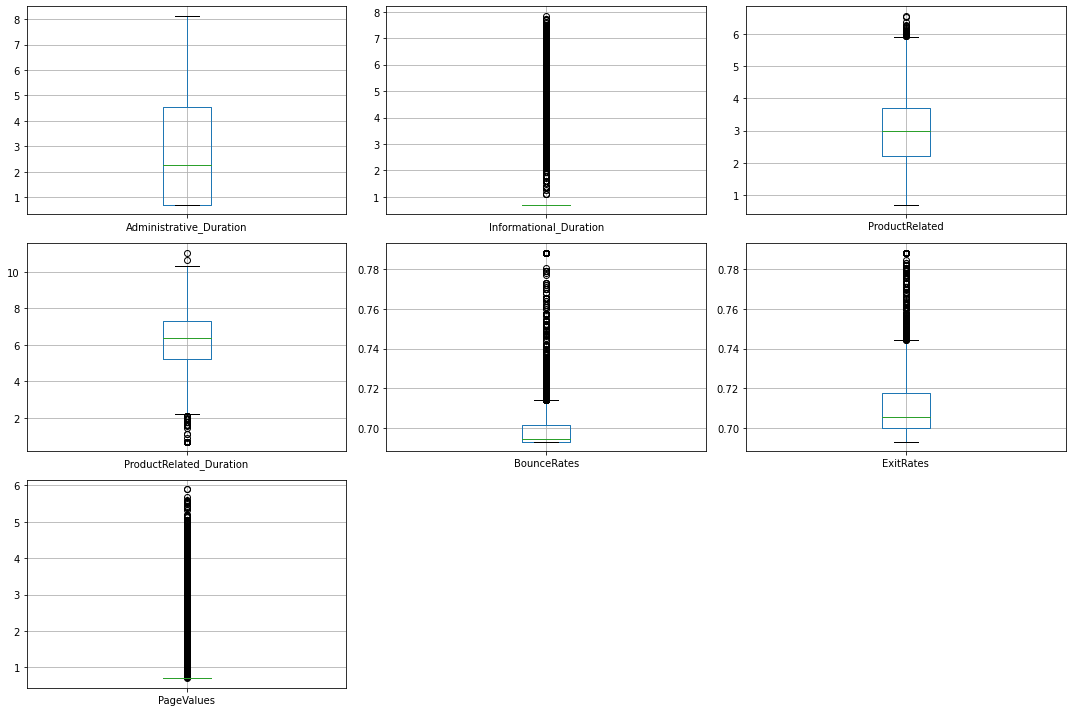

In [36]:
# # Plot das Variáveis Contínuas 
# Tamanho da Área de Plotagem
fig = plt.figure(figsize= (15,10))

# Loop Pelas Variáveis Contínuas
for i, col in enumerate(continuos):
  plt.subplot(3, 3, i +1);
  df.boxplot(col);
  plt.tight_layout()
  plt.savefig('boxplot1.png')

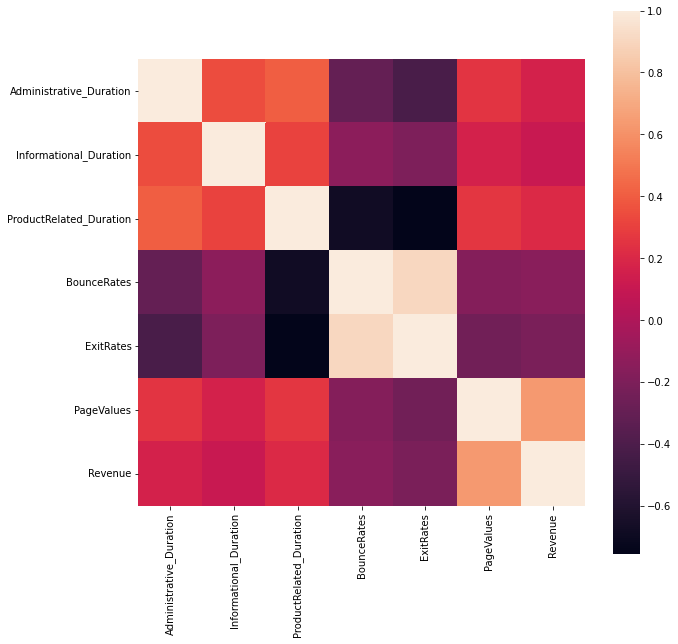

In [37]:
# Matriz de Correlação entre Variáveis contínuas
# Área de Plotagem
plt.figure(figsize = (10,10))

# Matriz de Correlação
sns.heatmap(df[['Administrative_Duration',
                'Informational_Duration',
                'ProductRelated_Duration',
                'BounceRates',
                'ExitRates',
                'PageValues',
                'Revenue']].corr(), vmax = 1., square = True)

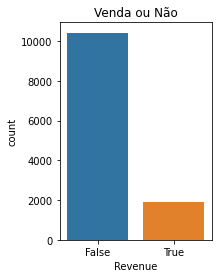

In [38]:
# Visualização de Gráficos de Variáveis Categóricas para analisar como a variável de destino é influenciada por elas.
# countplot Venda ou não
plt.subplot(1,2,2)
plt.title("Venda ou Não")
sns.countplot(df['Revenue'])

In [39]:
# 3° Pré-Processamento dos Dados
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [40]:
# Criar o encoder
lb = LabelEncoder()
# Aplicar o encoder nas Variáveis que estão com string
df_original['Month'] = lb.fit_transform(df_original['Month'])
df_original['VisitorType'] = lb.fit_transform(df_original['VisitorType'])

# Remove Valores Missing eventualmente gerados
df_original.dropna(inplace= True)

In [41]:
df_original.head(100)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,2,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,2,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,2,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,2,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.0,0,0.0,2,33.000000,0.000000,0.100000,0.0,0.2,2,1,1,1,3,2,False,False
96,0,0.0,0,0.0,6,1566.500000,0.050000,0.066667,0.0,0.2,2,1,1,1,3,2,False,False
97,0,0.0,0,0.0,4,105.000000,0.000000,0.025000,0.0,0.6,2,1,1,1,4,2,False,False
98,0,0.0,1,0.0,7,50.000000,0.038095,0.080952,0.0,0.6,2,2,4,1,7,2,False,False


In [42]:
# Shape
df_original.shape

(12330, 18)

In [43]:
# Verificando se a Variável resposta está balanceada
target_count = df_original.Revenue.value_counts()
target_count

False    10422
True      1908
Name: Revenue, dtype: int64

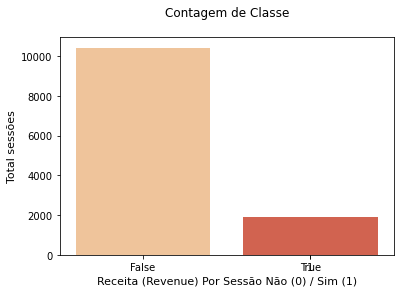

In [44]:
# Plot
sns.countplot(df_original.Revenue, palette= "OrRd")
plt.boxplot(False)
plt.xlabel('Receita (Revenue) Por Sessão Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total sessões', fontsize = 11)
plt.title('Contagem de Classe\n')
plt.show()

In [45]:
# Instala e Import o Pacote Imblearn
!pip install -q Imblearn

In [46]:
# Versões dos Pacotes usados neste Jupyter Notebook
%reload_ext watermark
%watermark -a "Ciência dos Dados" --iversions

Author: Ciência dos Dados

pandas    : 1.1.5
matplotlib: 3.2.2
IPython   : 5.5.0
sklearn   : 0.0
numpy     : 1.19.5
seaborn   : 0.11.2



In [47]:
# Shape
df_original.shape

(12330, 18)

In [48]:
# variáveis Explicativas
df_original.iloc[:, 0:17].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True


In [49]:
# Variáveis Target
df_original.iloc[:,17].head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

In [50]:
# Importa a Função
from imblearn.over_sampling import SMOTE

# Seed para reproduzir o mesmo resultado
seed = 7

In [51]:
# Separa X e y
X = df_original.iloc[:, 0:17]
y = df_original.iloc[:, 17]

In [52]:
# Cria o Balanceador
smote_bal = SMOTE(random_state= seed)

In [53]:
# Aplicar o Balanceador
X_res, y_res = smote_bal.fit_resample(X,y)

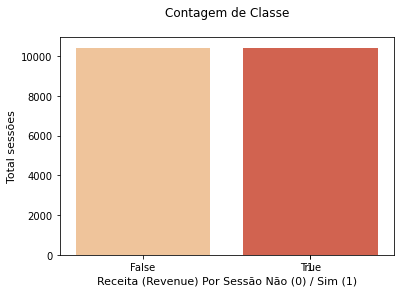

In [54]:
# Plot
sns.countplot(y_res, palette= "OrRd")
plt.boxplot(False)
plt.xlabel('Receita (Revenue) Por Sessão Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total sessões', fontsize = 11)
plt.title('Contagem de Classe\n')
plt.show()

In [55]:
# Shape dos dados Originais 
df_original.shape

(12330, 18)

In [56]:
# Shape dos dados Reamostrados
X_res.shape

(20844, 17)

In [57]:
# Shape dos dados Reamostrados
y_res.shape

(20844,)

In [58]:
# Ajustando X e y
X = X_res
y = y_res

In [59]:
# Divisão em Dados de Treino e Teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [82]:
# 4º Construção da máquina Preditiva
# Modelo Baseline com Kernel Linear e Dados Padronizados(Scaled)
# Padronização
sc = StandardScaler()
X_treino_scaled = sc.fit_transform(X_treino)
X_teste_scaled = sc.fit_transform(X_teste)

In [83]:
X_treino_scaled

array([[ 0.07545054,  1.09518883,  1.06663479, ..., -0.54347477,
         0.50448477, -0.60955256],
       [ 1.71081265,  2.50542309,  0.89489428, ...,  0.10947163,
        -1.79977555, -0.12008013],
       [-0.80370638, -0.52630159, -0.4526941 , ..., -0.54347477,
         0.50448477,  0.30963846],
       ...,
       [-0.80370638, -0.52630159, -0.4526941 , ...,  2.42500851,
         0.50448477, -0.60955256],
       [-0.80370638, -0.52630159, -0.4526941 , ...,  1.61542216,
         0.50448477, -0.60955256],
       [-0.80370638, -0.52630159, -0.4526941 , ...,  0.44295589,
        -1.36777611, -0.60955256]])

In [84]:
X_teste_scaled

array([[ 0.69690081, -0.1716654 , -0.45244919, ..., -0.26393533,
         0.50122705, -0.60999776],
       [-0.80901879, -0.52436982, -0.45244919, ..., -0.81330019,
         0.50122705, -0.60999776],
       [ 0.69690081,  0.34316926, -0.45244919, ..., -0.53861776,
        -2.39610792,  1.89849788],
       ...,
       [ 0.49602049, -0.00273777,  2.39178836, ...,  0.80442634,
         0.50122705, -0.60999776],
       [-0.80901879, -0.52436982, -0.45244919, ..., -0.81330019,
         0.50122705, -0.60999776],
       [ 0.37349674, -0.23874234,  0.49569112, ..., -0.43685078,
         0.50122705, -0.60999776]])

In [63]:
# Criar o Modelo 
modelo_v1 = svm.SVC(kernel= 'linear')

In [64]:
# Treinamento
start = time.time()
modelo_v1.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo:', end-start)

Tempo de Treinamento do Modelo: 14.626544952392578


In [65]:
# Previsões
previsoes_v1 = modelo_v1.predict(X_teste_scaled)

In [66]:
# 5º Avaliação da máquina Preditiva
# Dicionário de Métricas e Metadados
SVM_dict_v1 = {'Modelo':'SVM', 
               'Versão':'1',
               'Kernel':'Linear com Dados Padronizados',
               'Precision':precision_score(previsoes_v1, y_teste),
               'Recall':recall_score(previsoes_v1, y_teste),
               'F1 Score':f1_score(previsoes_v1, y_teste),
               'Acururácia':accuracy_score(previsoes_v1, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v1)}

In [67]:
# Print
print("Métricas em Teste:\n")
SVM_dict_v1

Métricas em Teste:



{'AUC': 0.8316890274465002,
 'Acururácia': 0.8301886792452831,
 'F1 Score': 0.8200609962724501,
 'Kernel': 'Linear com Dados Padronizados',
 'Modelo': 'SVM',
 'Precision': 0.758382952052648,
 'Recall': 0.8926595352268536,
 'Versão': '1'}

In [119]:
# Otimização de Hiperparâmetros com Grid Search e kernel RBF
# Cria o Modelo
modelo_v2 = svm.SVC(kernel= 'rbf')

In [120]:
# Valores para o Grid
c_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001, 0.001, 3*0.001])

In [121]:
# Grid de Hiperparmetros
svm_param_grid = dict(gramma = gamma_range, c = c_range )

In [122]:
# Grid Search
start = time.time()
modelo_v2_grid_search_rbf = GridSearchCV(modelo_v2, svm_param_grid, cv = 3)

In [123]:
# Treinamento
start = time.time()
modelo_v2_grid_search_rbf = GridSearchCV(modelo_v2, svm_param_grid, cv = 3)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

Tempo de Treinamento do Modelo com Grid Search: 0.00010585784912109375


In [ ]:
# Acurácia em Treinamento
print(f"Acurácia em Treinamento: {modelo_v2_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v2_grid_search_rbf.best_params_}")

In [ ]:
# previsões
previsoes_v2 = modelo_v2_grid_search_rbf.predict(X_teste_scaled)

In [ ]:
# Dicionário de Métricas e Metadados
SVM_dict_v2 = {'Modelo':'SVM',
               'Versão':'2',
               'Kernel':'RBF com Dados Padronizados',
               'Precision': precision_score(previsoes_v2, y_teste),
               'Recall': recall_score(previsoes_v2, y_teste),
               'F1 Score': f1_score(previsoes_v2, y_teste),
               'Acurácia': accuracy_score(previsoes_v2, y_teste),
               'AUC': roc_auc_score(y_teste, previsoes_v2)}

In [104]:
# Print
print("Métricas em Teste:\n")

Métricas em Teste:



In [ ]:
# Concatenando todos os dicionários em um dataframe do Pabdas
resumo = pd.DataFrame({'Baseline': pd.Series(SVM_dict_v1,
                                             'Máquina_Preditiva': pd.Series(SVM_dict_v2)})

In [ ]:
# Print
resumo